In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score

In [5]:
import plotly.express as px

In [96]:
# load data
df = pd.read_csv('A5_question2_data.csv')

In [4]:
df.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


### Exploratory data analysis

#### Enroll rate between private and public universities

In [97]:
df['Enroll Rate'] = df['Enroll']/df['Accept']

In [93]:
private = df[df['Private']=='Yes']
Public = df[df['Private']=='No']
enroll_rate = df[['Private', 'Enroll Rate']]
enroll_rate = pd.DataFrame(enroll_rate)
x = enroll_rate['Private']
fig = px.box(enroll_rate, x = x, y="Enroll Rate",color = x, width = 800, height = 500, title = "Enroll rate comparison between private and public universities")
fig.update_layout(xaxis_title="Private or Not",
    yaxis_title="Enroll Rate",
    legend_title="Enroll Rate",
)
fig.show()

#### Conclusion:
As the box plot shows, public schools have a higher enroll rate than private schools, while private schools have some exceptional examples of high enroll rate.

#### Top 10 highest enroll rate among schools

In [107]:
high_enroll_rate = df.sort_values(by = 'Enroll Rate', ascending = False).head(10)
fig = px.bar(high_enroll_rate, x = 'Unnamed: 0', y = 'Enroll Rate', width = 800, height = 500, title = "Top 10 highest enroll rate among schools")

fig.update_layout(xaxis_title="School Name",
    yaxis_title="Enroll Rate",
    legend_title="School Name",
)
fig.show()

#### Relationship of outstate and graduation rate between private and public universities

In [160]:
fig = px.scatter(df, x="Outstate", y="Grad.Rate", color="Private")
fig.show()

#### Conclusion:
There is a difference among outstate and graduation rate between public and private schools. As he graph shows, private schools with higher outstate students are much scatted on higher graduation rate.

#### Correlation chart of features

<AxesSubplot:>

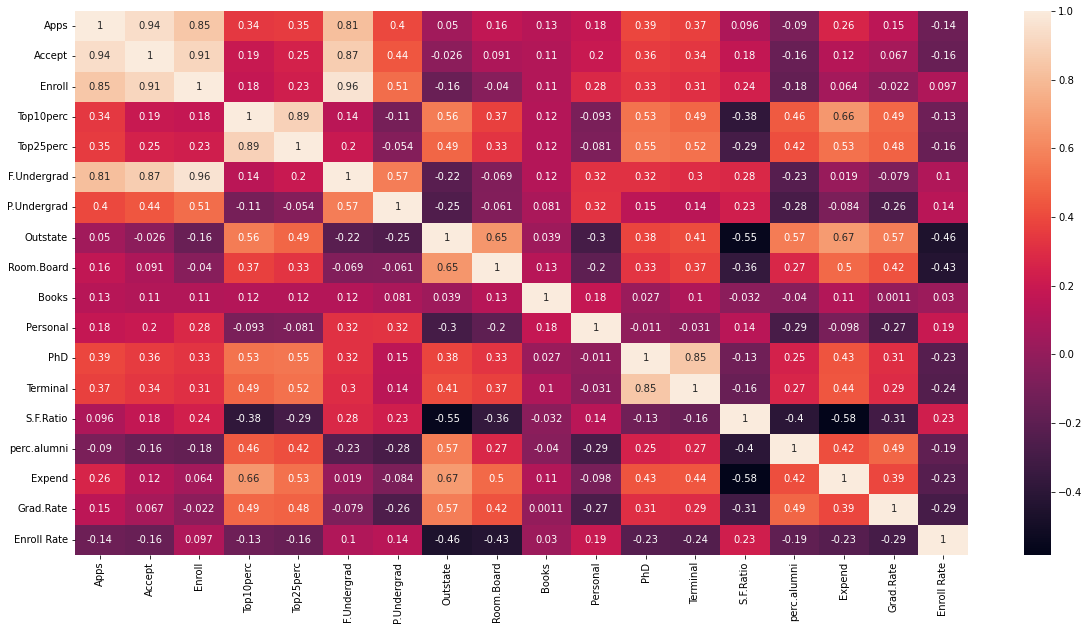

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

### Logistic regression class

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score

In [ ]:
# load data
df = pd.read_csv('A5_question2_data.csv')

In [54]:
df['Private'] = df['Private'].map({'Yes':1,'No':0})

In [42]:
X = df.iloc[:,2:18]
y = df[['Private']]

In [43]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [44]:
# import the class
from sklearn.linear_model import LogisticRegression

In [45]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
y_pred_accuracy = logreg.score(X_test,y_test)
y_pred_accuracy

0.9743589743589743

In [48]:
r2_score(y_test, y_pred)

0.8733766233766234

In [50]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 42,   2],
       [  2, 110]])

Text(0.5, 257.44, 'Predicted label')

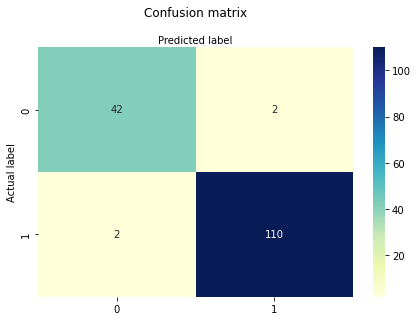

In [122]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.95      0.95      0.95        44
   with diabetes       0.98      0.98      0.98       112

        accuracy                           0.97       156
       macro avg       0.97      0.97      0.97       156
    weighted avg       0.97      0.97      0.97       156



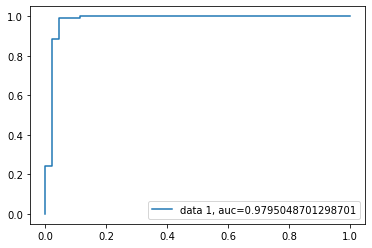

In [124]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### K means clusters

In [6]:
from sklearn.cluster import KMeans

In [142]:
# load data
df = pd.read_csv('A5_question2_data.csv')
df = df.drop("Unnamed: 0", axis='columns')

In [143]:
# create k means model with 2 clutsters
kmeans = KMeans(n_clusters = 2)

In [144]:
kmeans.fit(df.drop('Private', axis = 1))

KMeans(n_clusters=2)

In [145]:
df['Cluster'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

In [146]:
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
print(confusion_matrix(df['Cluster'], kmeans.labels_))

[[138  74]
 [531  34]]


In [148]:
print(classification_report(df['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777




Test confusion_matrix


Text(33.0, 0.5, 'True')

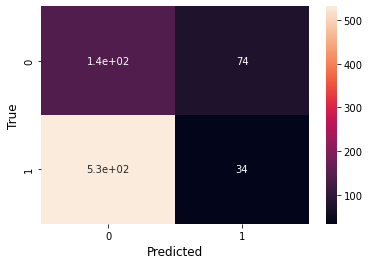

In [149]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, kmeans.labels_)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Evaluation

Obviously, when comparing the performance of K-means and Logistic regression, the latter has a significant higher f1-score than the former model. Because k-means is unsupervisd learn method, and I dropped the label column to identify private or not, so it requires computer to identify features so that the accuracy will be lower than the supervised learning method.